In [1]:
import pandas as pd
import numpy as np

In [5]:
from urllib.request import urlopen
import requests
import re

In [2]:
Anthro_dict = {}

In [3]:
for i in range(2000, 2022):
    year = str(i)
    df = pd.read_csv('data/Anthro_'+year+'.txt', sep='\t')
    df = df.replace('-', np.nan)
    Anthro_dict[i]=df

In [4]:
Anthro_dict[2000]

,PLAYER,POS,BODY FAT %,HAND LENGTH (INCHES),HAND WIDTH (INCHES),HEIGHT W/O SHOES,HEIGHT W/ SHOES,STANDING REACH,WEIGHT (LBS),WINGSPAN
0,Malik Allen,PF-C,-%,NaN,NaN,6' 8.25'',NaN,9' 1'',271.0,7' 2.5''
1,Harold Arceneaux,SG-SF,-%,NaN,NaN,6' 4.5'',NaN,8' 7'',219.0,6' 8.5''
2,Lamont Barnes,PF-C,-%,NaN,NaN,6' 8.5'',NaN,9' 0'',235.5,7' 3.5''
3,Mario Bland,PF,-%,NaN,NaN,6' 5.5'',NaN,8' 7'',287.0,7' 0''
4,Primoz Brezec,C,-%,NaN,NaN,7' 0.75'',NaN,9' 2'',243.0,7' 2''
...,...,...,...,...,...,...,...,...,...,...
60,Jabari Smith,PF-C,-%,NaN,NaN,6' 9.75'',NaN,9' 1.5'',240.5,7' 2.5''
61,Jarrett Stephens,PF,-%,NaN,NaN,6' 5.25'',NaN,8' 7'',258.0,6' 9.25''
62,Bootsy Thornton,SG,-%,NaN,NaN,6' 3.5'',NaN,8' 5.5'',194.5,6' 6.5''
63,Jaquay Walls,PG,-%,NaN,NaN,6' 1.25'',NaN,8' 0.5'',165.5,6' 2.5''


In [5]:
Anthro_dict[2000].columns

Index(['PLAYER', 'POS', 'BODY FAT %', 'HAND LENGTH (INCHES)',
       'HAND WIDTH (INCHES)', 'HEIGHT W/O SHOES', 'HEIGHT W/ SHOES',
       'STANDING REACH', 'WEIGHT (LBS)', 'WINGSPAN'],
      dtype='object')

In [6]:
float(Anthro_dict[2000].at[0, 'HEIGHT W/O SHOES'].split('\'')[1])

8.25

In [7]:
def length_conver(value):
    foot = int(value.split('\'')[0])
    inch = float(value.split('\'')[1])
    return round(foot*30.48+inch*2.54, 2)

def lbs_conver(value):
    return round(float(value)*0.453592, 2)

In [8]:
Anthro_dict[2000].shape[0]

65

In [9]:
for year in Anthro_dict:
#     Anthro_dict[year].rename(columns={'HEIGHT W/O SHOES': })
    for i in range(Anthro_dict[year].shape[0]):
        if not pd.isnull(Anthro_dict[year].at[i, 'HEIGHT W/O SHOES']):
            Anthro_dict[year].at[i, 'HEIGHT W/O SHOES'] = length_conver(Anthro_dict[year].at[i, 'HEIGHT W/O SHOES'])
        if not pd.isnull(Anthro_dict[year].at[i, 'STANDING REACH']):
            Anthro_dict[year].at[i, 'STANDING REACH'] = length_conver(Anthro_dict[year].at[i, 'STANDING REACH'])
        if not pd.isnull(Anthro_dict[year].at[i, 'WINGSPAN']):
            Anthro_dict[year].at[i, 'WINGSPAN'] = length_conver(Anthro_dict[year].at[i, 'WINGSPAN'])
        if not pd.isnull(Anthro_dict[year].at[i, 'WEIGHT (LBS)']):
            Anthro_dict[year].at[i, 'WEIGHT (LBS)'] = lbs_conver(Anthro_dict[year].at[i, 'WEIGHT (LBS)'])

In [10]:
avg_height = []
avg_weight = []
avg_reach = []
avg_wingspan = []

In [11]:
for year in Anthro_dict:
    avg_height.append(Anthro_dict[year]['HEIGHT W/O SHOES'].mean())
    avg_weight.append(Anthro_dict[year]['WEIGHT (LBS)'].mean())
    avg_reach.append(Anthro_dict[year]['STANDING REACH'].mean())
    avg_wingspan.append(Anthro_dict[year]['WINGSPAN'].mean())
#     print(Anthro_dict[year]['HEIGHT W/O SHOES'].values)

In [12]:
import matplotlib.pyplot as plt

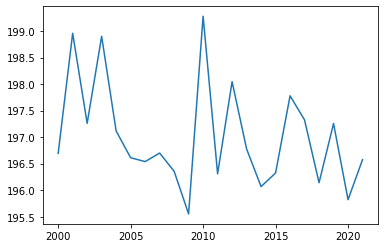

In [18]:
years = np.arange(2000,2022)
plt.plot(years, avg_height)

In [48]:
pd.set_option('display.max_rows', 500)
Anthro_dict[2008]

,PLAYER,POS,BODY FAT %,HAND LENGTH (INCHES),HAND WIDTH (INCHES),HEIGHT W/O SHOES,HEIGHT W/ SHOES,STANDING REACH,WEIGHT (LBS),WINGSPAN
0,Joe Alexander,SF-PF,5.80%,-,-,201.29,6' 8.25'',269.24,99.79,212.09
1,Darrell Arthur,PF,7.30%,-,-,201.93,6' 8.5'',271.78,97.98,210.19
2,D.J. Augustin,PG,8.10%,-,-,177.8,5' 11.5'',240.03,77.79,191.77
3,Jerryd Bayless,PG-SG,4.70%,-,-,187.32,6' 3'',246.38,92.53,191.77
4,Michael Beasley,PF-SF,7.70%,-,-,200.66,6' 8.25'',271.78,108.41,214.0
5,Ramel Bradley,PG-SG,5.70%,-,-,186.06,6' 2.25'',248.92,83.46,195.58
6,Tyrone Brazelton,PG,8.10%,-,-,177.8,5' 11'',238.76,75.30,187.32
7,Takais Brown,PF,9.20%,-,-,201.29,6' 8.5'',269.24,114.31,208.28
8,Keith Brumbaugh,SF-PF,4.00%,-,-,201.93,6' 8.75'',265.43,86.18,201.29
9,Stanley Burrell,PG,5.60%,-,-,186.69,6' 2.5'',247.65,91.17,198.75


In [9]:
pd.read_csv('data/Anthro_2000.txt', sep='\t')

,PLAYER,POS,BODY FAT %,HAND LENGTH (INCHES),HAND WIDTH (INCHES),HEIGHT W/O SHOES,HEIGHT W/ SHOES,STANDING REACH,WEIGHT (LBS),WINGSPAN
0,Malik Allen,PF-C,-%,-,-,6' 8.25'',NaN,9' 1'',271.0,7' 2.5''
1,Harold Arceneaux,SG-SF,-%,-,-,6' 4.5'',NaN,8' 7'',219.0,6' 8.5''
2,Lamont Barnes,PF-C,-%,-,-,6' 8.5'',NaN,9' 0'',235.5,7' 3.5''
3,Mario Bland,PF,-%,-,-,6' 5.5'',NaN,8' 7'',287.0,7' 0''
4,Primoz Brezec,C,-%,-,-,7' 0.75'',NaN,9' 2'',243.0,7' 2''
...,...,...,...,...,...,...,...,...,...,...
60,Jabari Smith,PF-C,-%,-,-,6' 9.75'',NaN,9' 1.5'',240.5,7' 2.5''
61,Jarrett Stephens,PF,-%,-,-,6' 5.25'',NaN,8' 7'',258.0,6' 9.25''
62,Bootsy Thornton,SG,-%,-,-,6' 3.5'',NaN,8' 5.5'',194.5,6' 6.5''
63,Jaquay Walls,PG,-%,-,-,6' 1.25'',NaN,8' 0.5'',165.5,6' 2.5''


In [7]:
requests.get('https://www.basketball-reference.com/players/z/zimmede01.html').text.count('NBA</td>')

9

In [4]:
tables = pd.read_html('https://www.nba.com/stats/draft/combine-anthro/?SeasonYear=2000-01')
tables

ValueError: No tables found